# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def calcHistogram(image):
    arr=np.zeros(256)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            arr[image[x][y]]+=1
            
    return arr


In [3]:

def getThresHold(image):
        
        image=np.copy(image).astype(np.uint8)
        arr=calcHistogram(image)
        total=np.sum(arr)
        thresh =0
        for x in range(len(arr)):
            thresh+=x*arr[x]
        AvMean=int(np.round(thresh/total))
       
        
        i=0
        while(1):
            i+=1
            total1=np.sum(arr[0:AvMean])
            thresh=0
            for x in range(0,AvMean):    
                thresh += x*arr[x]
                    
            AvMean1=int(np.round(thresh/total1))
           
           
                
            total2=np.sum(arr[AvMean:arr.shape[0]])
            thresh=0
            
            for y in range(AvMean,arr.shape[0]):   
                thresh+=y*arr[y]
            
            AvMean2=int(np.round(thresh/total2)) 
            
        
            AvMeanT=int(np.round((AvMean1+AvMean2)/2))
            if(AvMean==AvMeanT):
                break
                
            AvMean=AvMeanT
      
            
        
        return AvMean
            


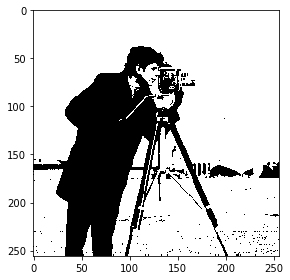

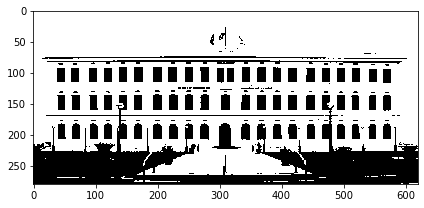

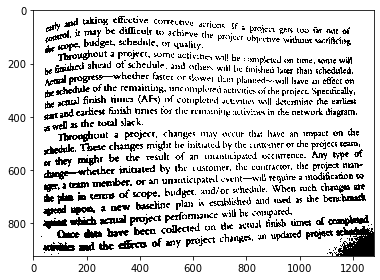

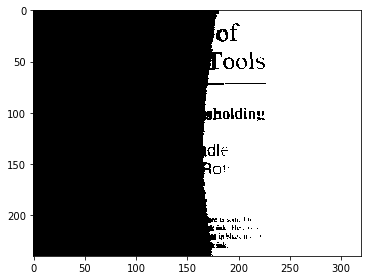

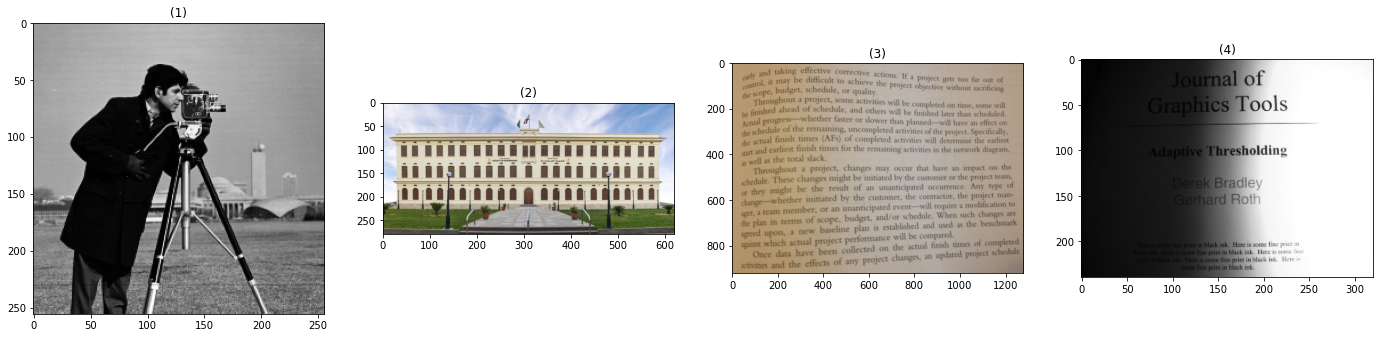

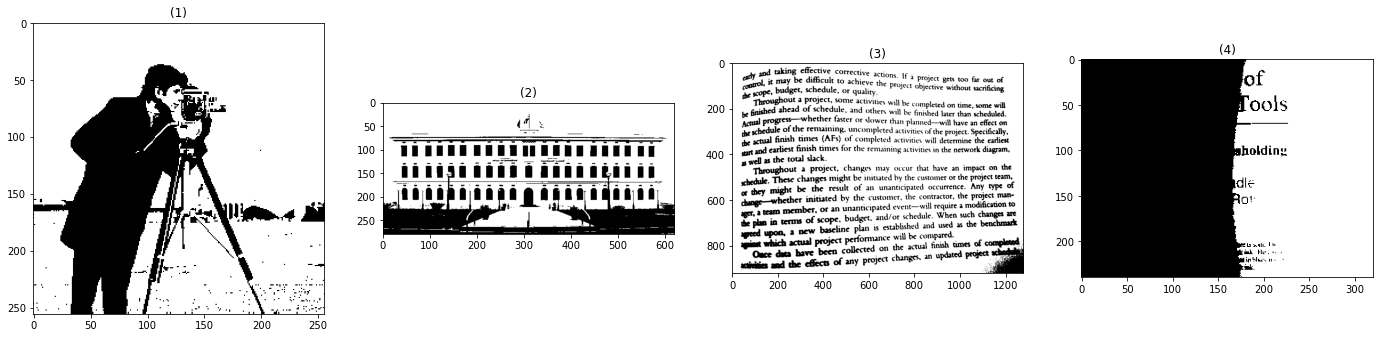

In [4]:


image1=io.imread("cameraman.png")
image2=io.imread("cufe.png")
image3=io.imread("book1.png")
image4=io.imread("book.png")



ThreshHold=getThresHold(image1)
image1=image1>ThreshHold
io.imshow(image1)
io.show()


image2=rgb2gray(image2)*255
ThreshHold=getThresHold(image2)
image2=image2>ThreshHold
io.imshow(image2)
io.show()

image3=rgb2gray(image3)*255
ThreshHold=getThresHold(image3)
image3=image3>ThreshHold
io.imshow(image3)
io.show()

ThreshHold=getThresHold(image4)
image4=image4>ThreshHold
io.imshow(image4)
io.show()


show_images([io.imread("cameraman.png"),io.imread("cufe.png"),io.imread("book1.png"),io.imread("book.png")])


show_images(([image1,image2,image3,image4]))



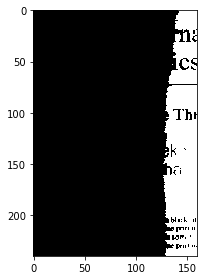

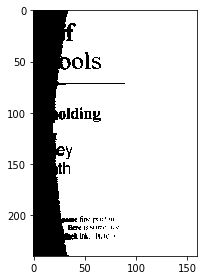

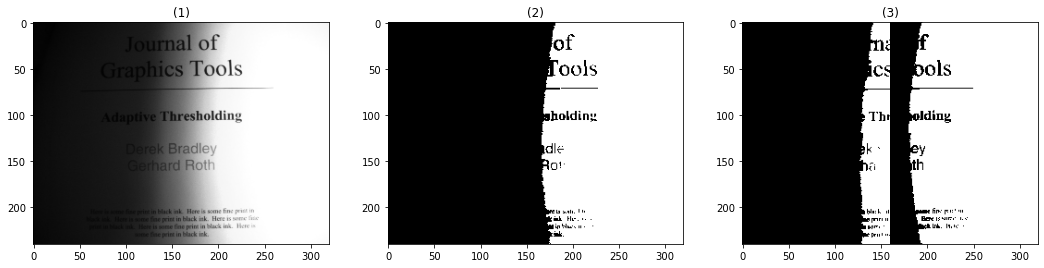

In [5]:
image4=io.imread("book.png")

x=image4.shape[0]
y=image4.shape[1]




sub_image1=image4[0:int(x/2),0:int(y/2)]
ThreshHold=getThresHold(sub_image1)
sub_image1=sub_image1>ThreshHold

sub_image2=image4[int(x/2):x,0:int(y/2)]
ThreshHold=getThresHold(sub_image2)
sub_image2=sub_image2>ThreshHold

sub_image3=image4[0:int(x/2),int(y/2):y]
ThreshHold=getThresHold(sub_image3)
sub_image3=sub_image3>ThreshHold

sub_image4=image4[int(x/2):x,int(y/2):y]
ThreshHold=getThresHold(sub_image4)
sub_image4=sub_image4>ThreshHold

whole_image1=np.concatenate((sub_image1,sub_image2))
io.imshow(whole_image1)
io.show()

whole_image2=np.concatenate((sub_image3,sub_image4))
io.imshow(whole_image2)
io.show()




ThreshHold=getThresHold(image4)
image4= image4 > ThreshHold
show_images([io.imread("book.png"),image4,np.c_[whole_image1 , whole_image2]])
